# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Problem - understanding the difficulty of price prediction for used cars
the CRISP-DM process begins with the understanding of the business problem. Imagine for example a used car dealer who needs estimates what the price of a used car could be. The car dealer could be interest in predicting the price of a car based on its attributes. The need to answer business questions:

·         Is the price of a car related to its features?

·         Is the price of a care related to the condition of the car and its time since its manufactured date?

·         Can the price of a car be predicted based in its attribute with reasonable accuracy?

Due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, 
used cars sales are on a global increase. Predicting the prices of used cars is an interesting and much-needed problem to be addressed. 
Customers can be widely exploited by fixing unrealistic prices for the used cars and many falls into this trap. 
Therefore, rises an absolute necessity of a used car price prediction system to effectively determine the worthiness of the car using 
a variety of features. Due to the adverse pricing of cars and the nomadic nature of people in developed countries, 
the cars are mostly bought on a lease basis, 
where there is an agreement between the buyer and seller. 
These cars upon completion of the agreement are resold. So reselling has become an essential part of today’s world.

Given the description of used cars, the prediction of used cars is not an easy task. 
There are a variety of features of a car like:
the age of the car, its model, the manufacturer of the car (the original country of the manufacturer),its mileage or odometer reading in this case(the number of mildes it has run) 
Due to rising fuel prices because of the Ukraine/Russia war, fuel economy is also of prime importance - therefore fuel ('gas' 'diesel' 'hybrid' 'electric' 'other') are key determinants of price.
                                                                                       
Tangible features: type of fuel it uses, style, braking system - rwd, awd, the volume of its cylinders (measured in cc),  safety index, size,paint color, 
Intangibles features : consumer reviews, prestigious awards won by the car manufacturer.
Therefore, understanding the key features driving price of used car is key to help both the dealership and the consumer arrive at the best approach to agreeing on a closing price.      
As such, there arises a need for a model that can assign a price for a vehicle by evaluating its features taking the prices of other cars into consideration. 
In this Notebook, we use supervised learning methods to predict the prices of used cars. The model has been chosen after careful exploratory data analysis (linear regression and multiple regression) to determine the impact of each feature on price.

#### Methodology:
So, we propose a methodology using Machine Learning models to predict the prices of used cars given the features. The price is estimated based on the number of features as mentioned above.

Notebook outline:
- Step 1, we collect the data about used cars, identify important features that reflect the price.
- Step 2, we preprocess and remove entries with NA values. Discard features that are not relevant for the prediction of the price.
- Step 3, we apply ML models on the preprocessed dataset with features as inputs and the price as output.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [235]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from contextlib import contextmanager
from time import time
from tqdm import tqdm
import lightgbm as lgbm
import category_encoders as ce

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [236]:
data = pd.read_csv("/Users/kelvinchoo/UCBE/PracticalApplication-11-1/data/vehicles.csv")

In [237]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [238]:
data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [240]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [241]:
data.isna()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
1,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
2,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
3,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
4,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
426876,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
426877,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False
426878,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [242]:
data.shape[0]

426880

In [243]:
for col in data:
  print(data[col].unique())

[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura cou

In [244]:
# replace zero values with mean price
data['price'] = data['price'].replace(0, data['price'].mean())

In [245]:
# check that data has no more rows with zero price
(data["price"] == 0).sum()

0

In [246]:
## find number of rows with odometer=0
(data["odometer"] == 0).sum()

1965

In [247]:
# replace zero values with mean odometer
data['odometer'] = data['odometer'].replace(0, data['odometer'].mean())

In [248]:
# check that data has no more rows with zero odometer
(data["odometer"] == 0).sum()

0

In [249]:
mean_year = data['year'].mean()
print(int(mean_year))

2011


In [250]:
## find number of rows with nulls
data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [251]:
# replace null year with mean of the year for all vehicles
data['year'].fillna(int(data['year'].mean()), inplace=True)

In [252]:
## find number of rows with nulls
data.isna().sum()

id                   0
region               0
price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [253]:
# replace null year with mean of the year for all vehicles
data['odometer'].fillna(int(data['odometer'].mean()), inplace=True)

In [254]:
## find number of rows with nulls
data.isna().sum()

id                   0
region               0
price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer             0
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [255]:
df = data[data['model'].notna()]

In [256]:
df.shape[0]

421603

In [257]:
## find number of rows with nulls
df.isna().sum()

id                   0
region               0
price                0
year                 0
manufacturer     17577
model                0
condition       171101
cylinders       175004
fuel              2945
odometer             0
title_status      8143
transmission      2472
VIN             157407
drive           128256
size            302909
type             90489
paint_color     127205
state                0
dtype: int64

In [258]:
df.shape[0]

421603

In [259]:
# Set null VINs to NoVIN to preserve rows that have meaningful values
df["VIN"].fillna("No VIN", inplace = True)

/Users/kelvinchoo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [260]:
df.shape[0]

421603

In [261]:
## find number of rows with nulls
df.isna().sum()

id                   0
region               0
price                0
year                 0
manufacturer     17577
model                0
condition       171101
cylinders       175004
fuel              2945
odometer             0
title_status      8143
transmission      2472
VIN                  0
drive           128256
size            302909
type             90489
paint_color     127205
state                0
dtype: int64

In [262]:
df2 = df.dropna(how='any',axis=0) 

In [263]:
df2.shape[0]

79603

In [264]:
## find number of rows with nulls
df2.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [265]:
for col in data:
  print(df2[col].unique())

[7316356412 7314560853 7313406529 ... 7302384818 7302338378 7302301268]
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 

<AxesSubplot:xlabel='odometer'>

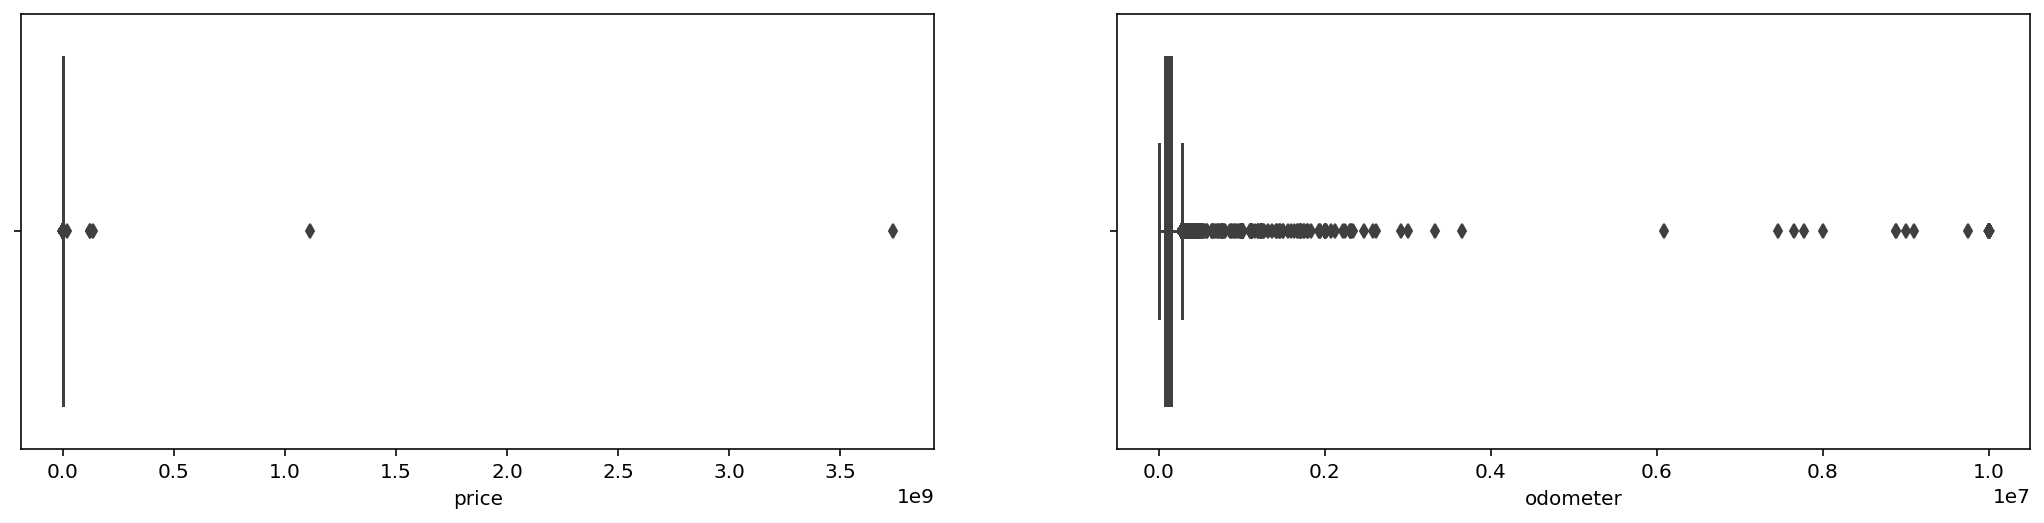

In [266]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.boxplot(x=df2['price'],ax=ax1)
sns.boxplot(x=df2['odometer'],ax=ax2)

<AxesSubplot:xlabel='year', ylabel='Average price by Year'>

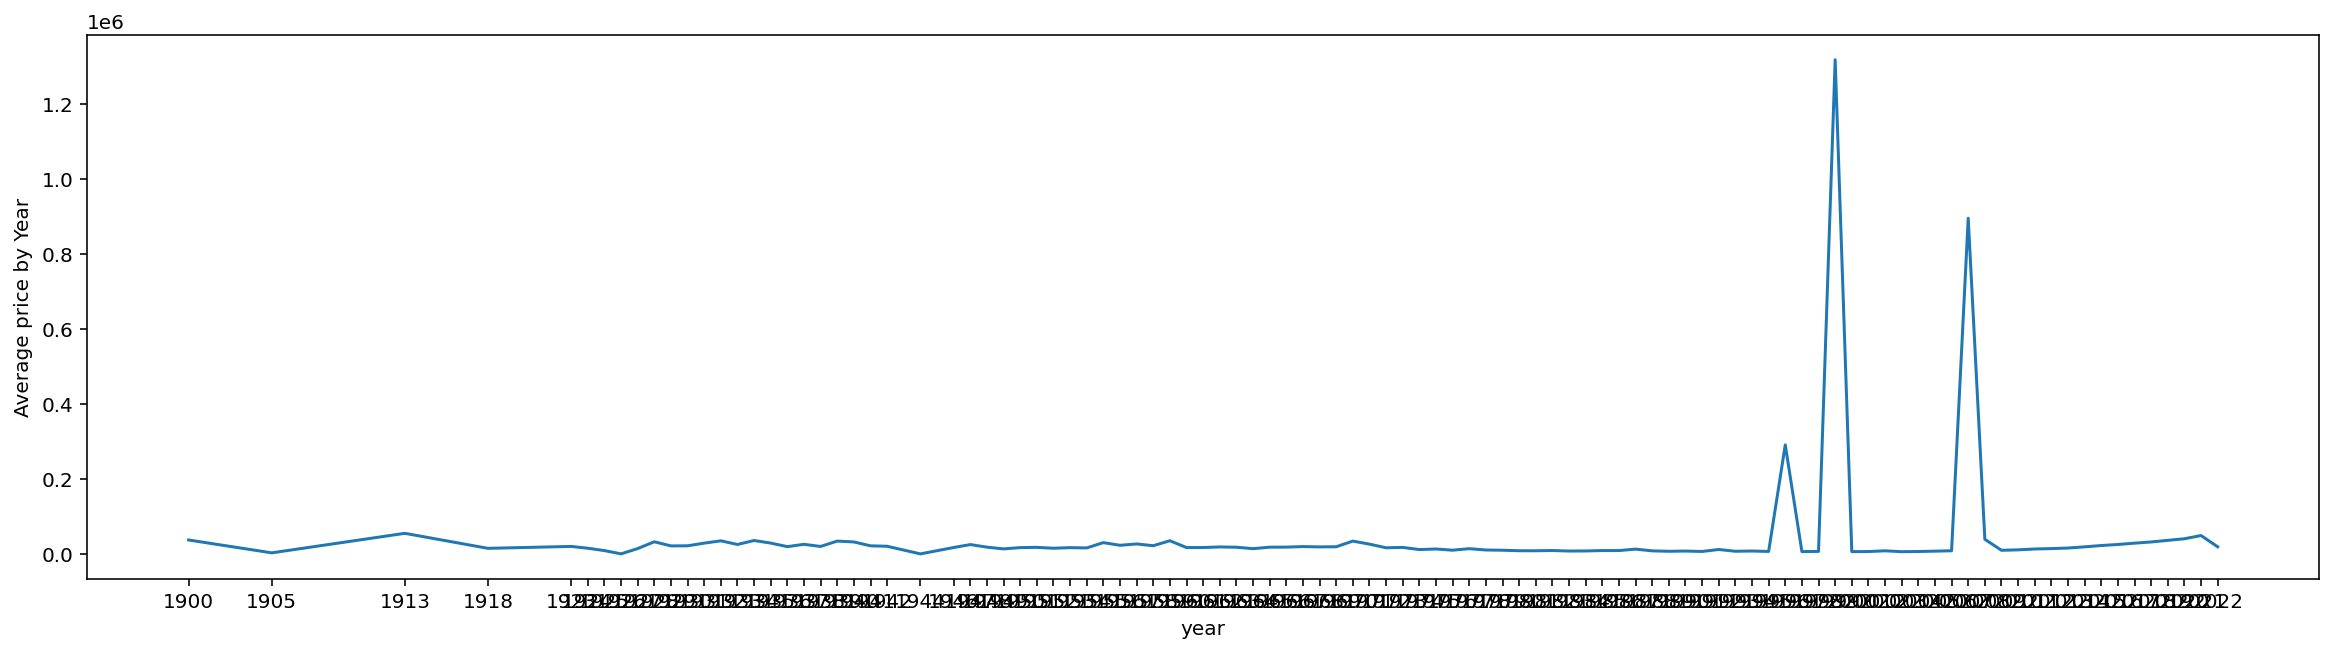

In [267]:
t1=df2.groupby(by='year')['price'].mean()
t1=pd.DataFrame(t1)
t1=t1.reset_index()
arr=np.array(t1['year'])
plt.figure(figsize=(20,5))
a=sns.lineplot(data=t1,x='year',y='price')
plt.xticks(arr)
plt.ylabel('Average price by Year')
a

IndexError: list index out of range

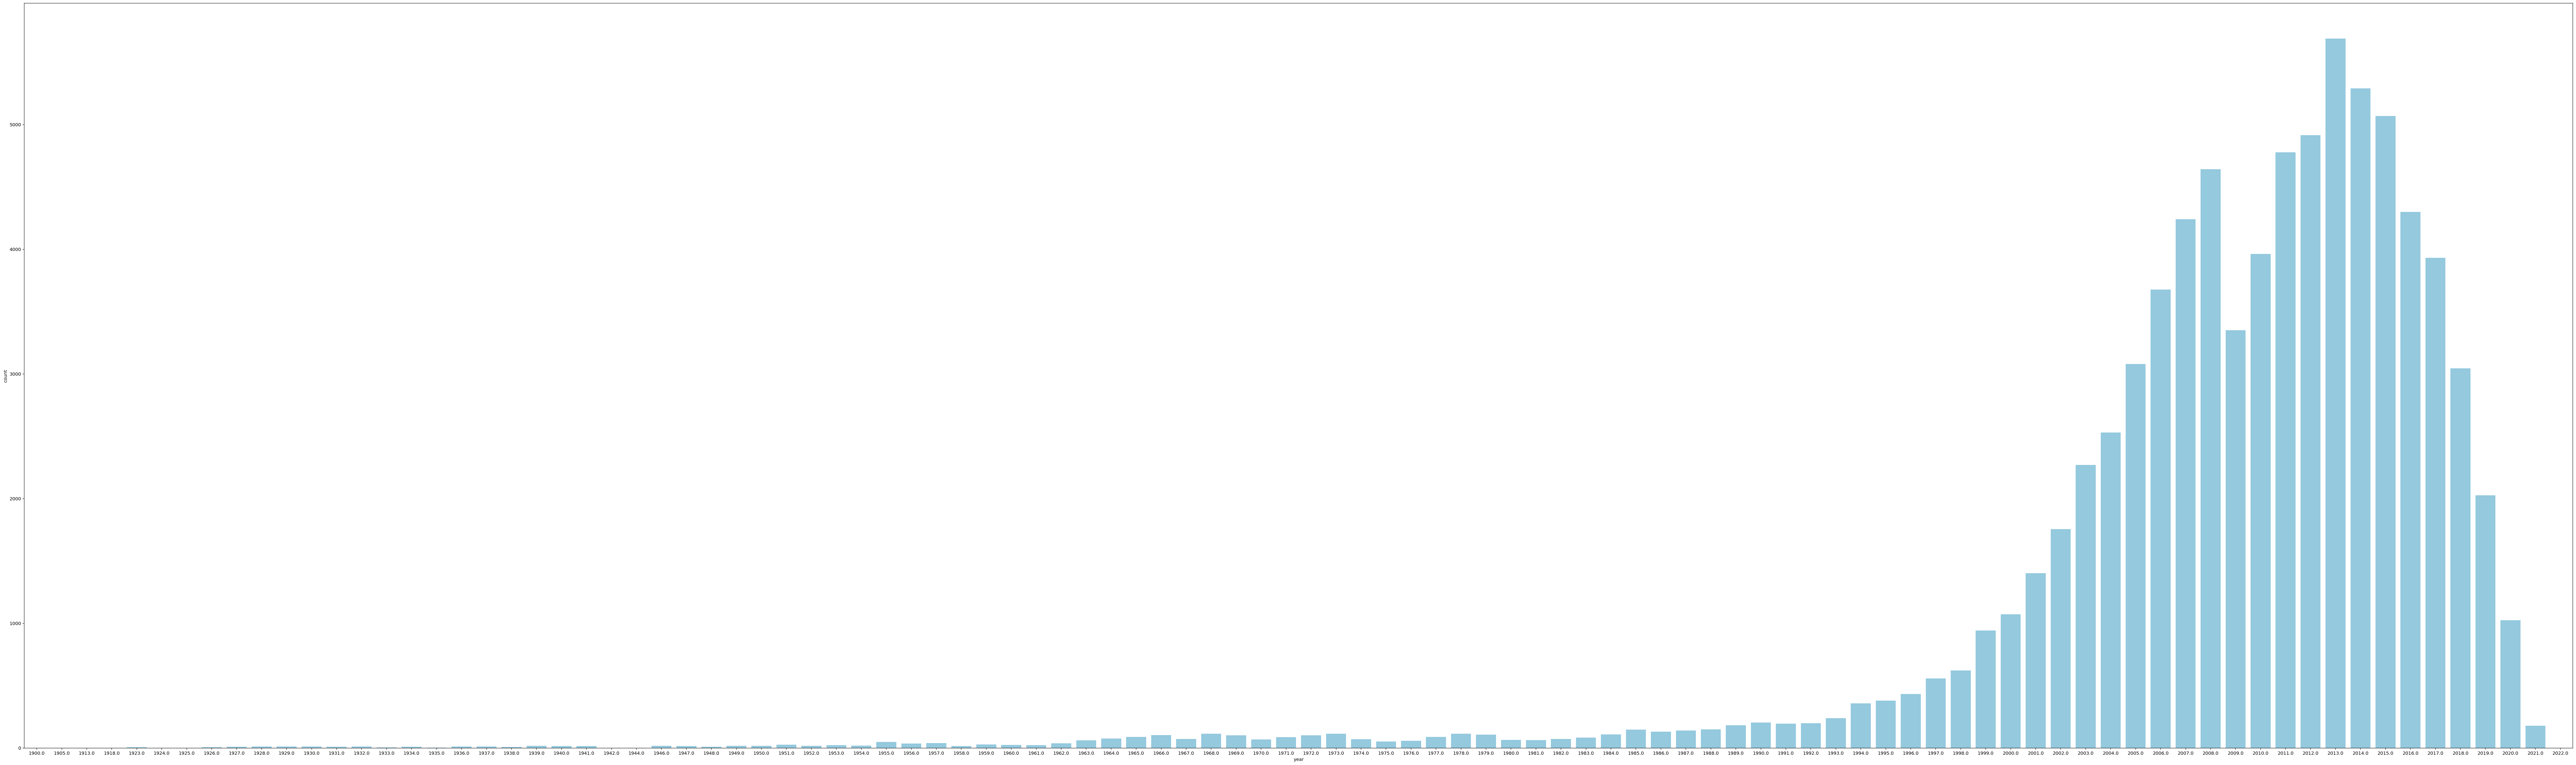

In [268]:
plt.figure(figsize=(100,30))
b=sns.countplot(data=df2,x='year', color='skyblue')
b.bar_label(b.containers[50])
plt.ylabel('Count of Car')
b

In [269]:
df2['Age(years)']=df2['year'].max()-df2['year']
df2['Age(years)']=df2['Age(years)'].astype('int')
df2.head()

/var/folders/l3/9xtv7x9n2rs7xwk9c451w0q40000gn/T/ipykernel_32398/2064338877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age(years)']=df2['year'].max()-df2['year']
/var/folders/l3/9xtv7x9n2rs7xwk9c451w0q40000gn/T/ipykernel_32398/2064338877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age(years)']=df2['Age(years)'].astype('int')


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,Age(years)
31,7316356412,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,No VIN,rwd,full-size,truck,black,al,9
55,7314560853,auburn,19900.0,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,No VIN,4wd,full-size,pickup,blue,al,18
59,7313406529,auburn,14000.0,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,No VIN,fwd,full-size,mini-van,silver,al,10
65,7312847466,auburn,22500.0,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,No VIN,rwd,full-size,truck,white,al,21
73,7312144944,auburn,15000.0,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,No VIN,rwd,mid-size,sedan,grey,al,5


In [285]:
df2['year']=df2['year'].astype('int')
df2['id']=df2['id'].astype('object')
display(df2.dtypes)

/var/folders/l3/9xtv7x9n2rs7xwk9c451w0q40000gn/T/ipykernel_32398/92868547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year']=df2['year'].astype('int')
/var/folders/l3/9xtv7x9n2rs7xwk9c451w0q40000gn/T/ipykernel_32398/92868547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id']=df2['id'].astype('object')


id               object
region           object
price           float64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
Age(years)        int64
dtype: object

In [286]:
for col in data:
  print(df2[col].unique())

[7316356412 7314560853 7313406529 ... 7302384818 7302338378 7302301268]
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 

In [287]:
df2.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,Age(years)
31,7316356412,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,No VIN,rwd,full-size,truck,black,al,9
55,7314560853,auburn,19900.0,2004,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,No VIN,4wd,full-size,pickup,blue,al,18
59,7313406529,auburn,14000.0,2012,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,No VIN,fwd,full-size,mini-van,silver,al,10
65,7312847466,auburn,22500.0,2001,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,No VIN,rwd,full-size,truck,white,al,21
73,7312144944,auburn,15000.0,2017,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,No VIN,rwd,mid-size,sedan,grey,al,5


In [288]:
## find number of rows with nulls
df2.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
Age(years)      0
dtype: int64

<AxesSubplot:xlabel='Top 10 high priced Manufacturer & Model', ylabel='Average Price'>

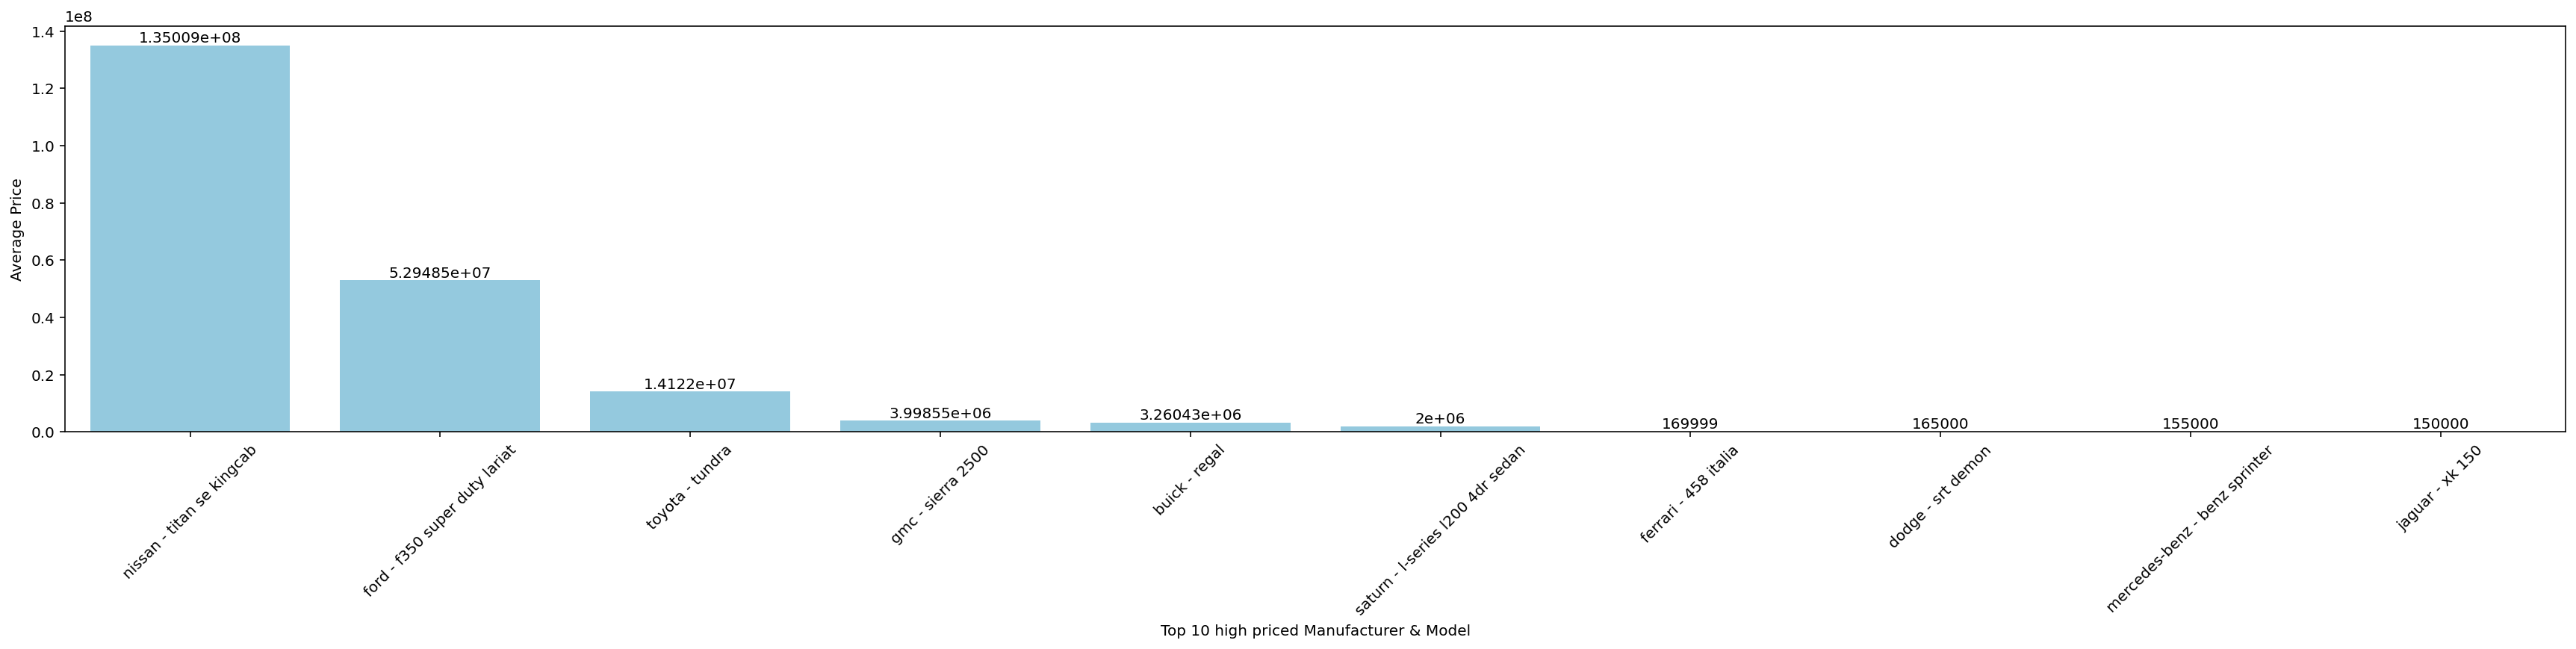

In [289]:
t2=df2.groupby(by=['manufacturer','model'])['price'].mean()
t2=pd.DataFrame(t2).reset_index()
t3=t2.sort_values(by='price',ascending=False).head(10)
t3['Manufacturer&Model']=t3['manufacturer'].str.cat(t3['model'], sep=' - ')
plt.figure(figsize=(30,5))
c=sns.barplot(data=t3,x='Manufacturer&Model', y='price', color='skyBlue')
c.bar_label(c.containers[0])
plt.xlabel('Top 10 high priced Manufacturer & Model')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
c

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [290]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


%matplotlib inline

In [291]:
df2.shape[0]

79603

<AxesSubplot:>

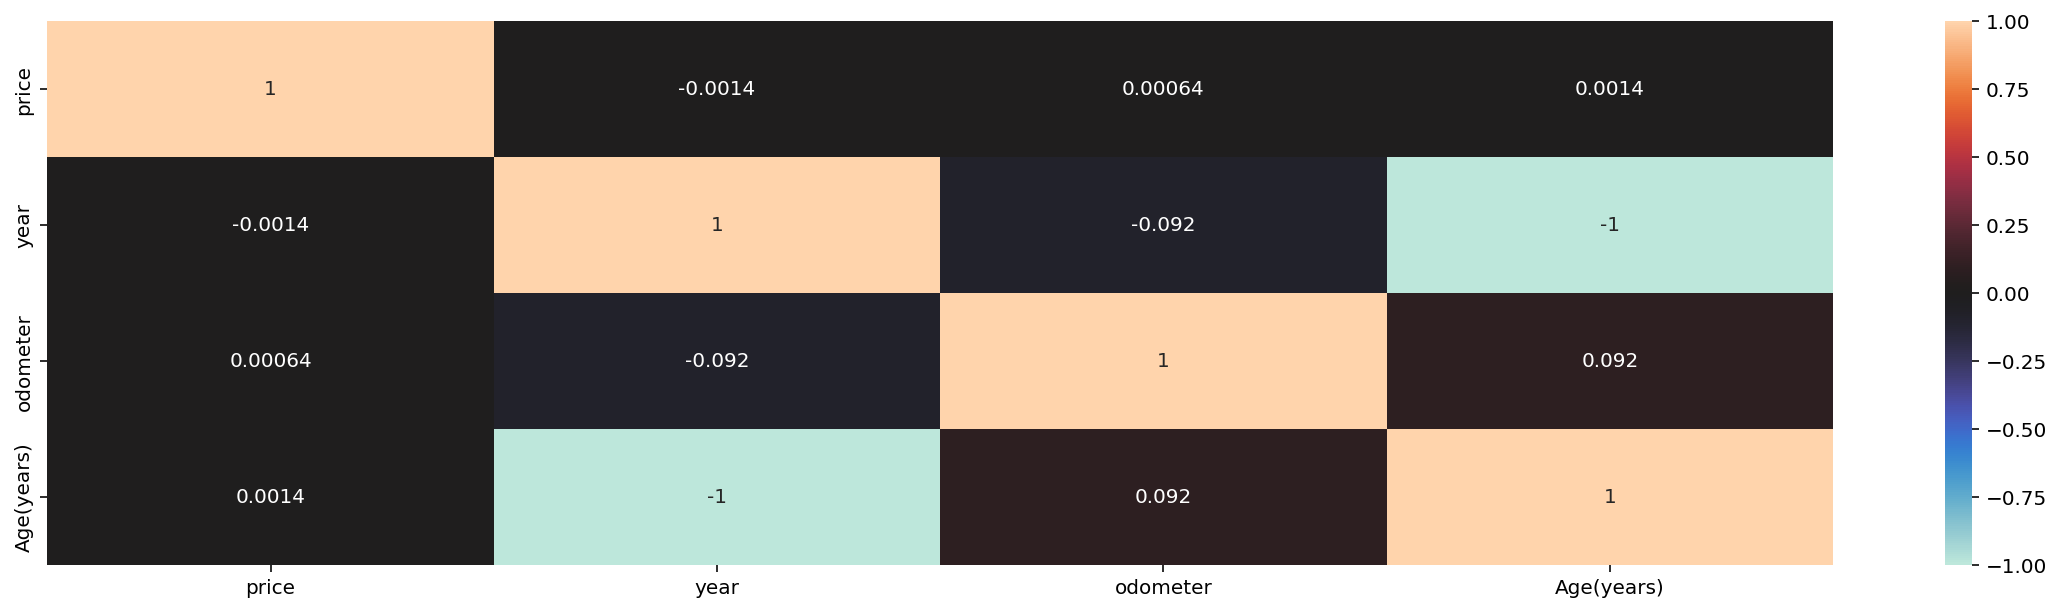

In [292]:
# Visualize correlations between attributes

plt.figure(figsize=(20,5))
features_correlation = df2.corr()
sns.heatmap(features_correlation, annot=True, vmin=-1, vmax=1, center=0)

In [293]:
X = pd.DataFrame(df2[["odometer", "Age(years)"]])
y = pd.DataFrame(df2["price"])

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

<AxesSubplot:xlabel='price', ylabel='odometer'>

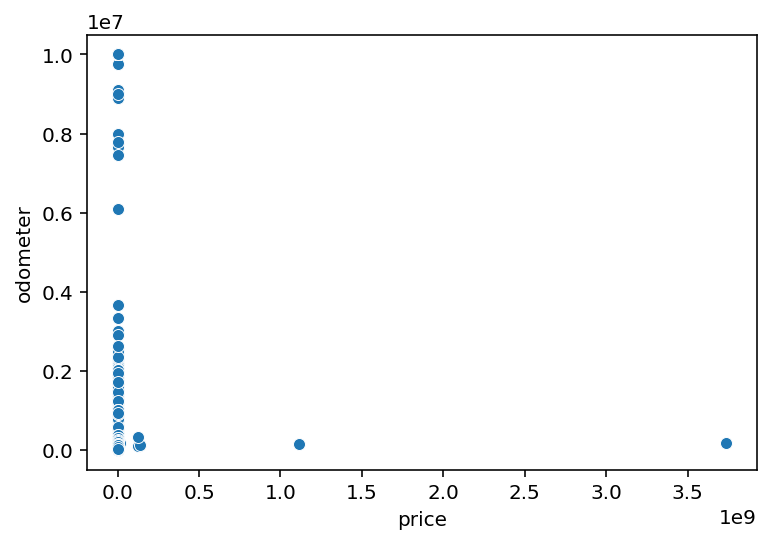

In [295]:
sns.scatterplot(data=df2,x='price',y='odometer')

<AxesSubplot:xlabel='Age(years)'>

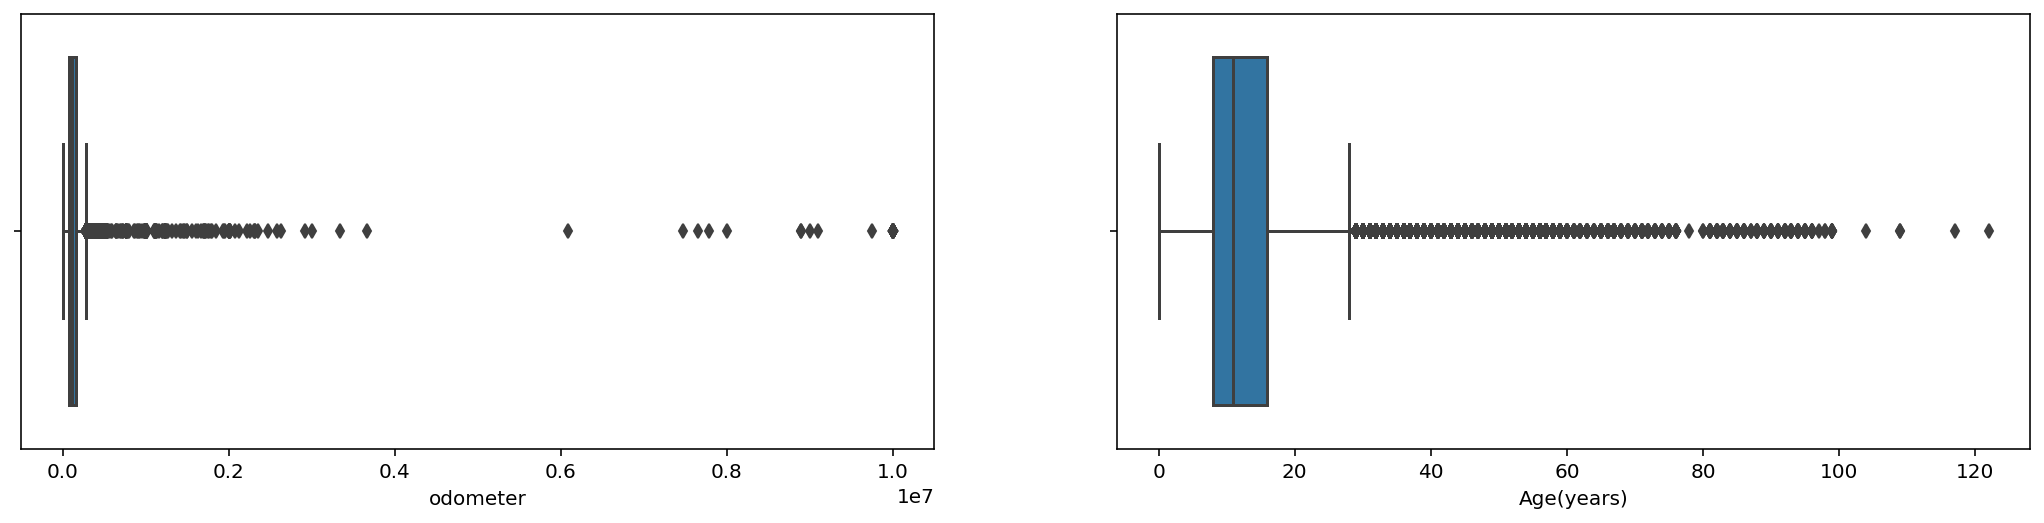

In [296]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.boxplot(x=df2['odometer'],ax=ax1)
sns.boxplot(x=df2['Age(years)'],ax=ax2)

In [297]:
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='price', ylabel='odometer'>

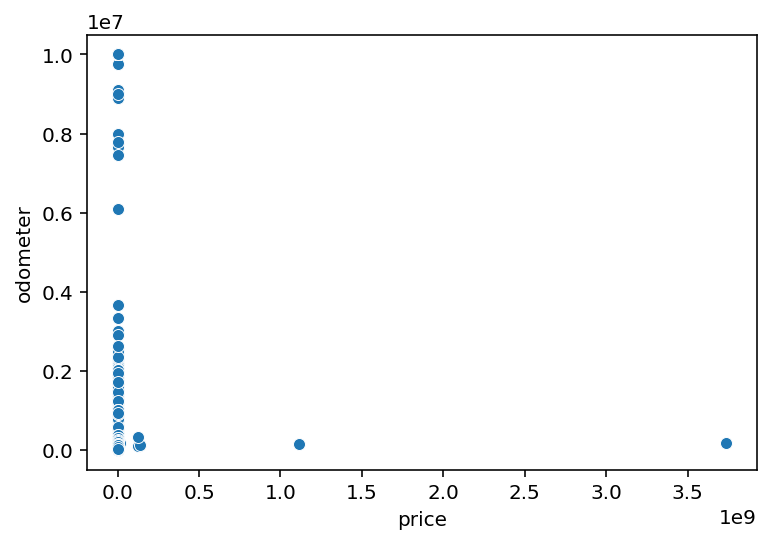

In [298]:
sns.scatterplot(data=df2,x='price',y='odometer')

<AxesSubplot:xlabel='price', ylabel='odometer'>

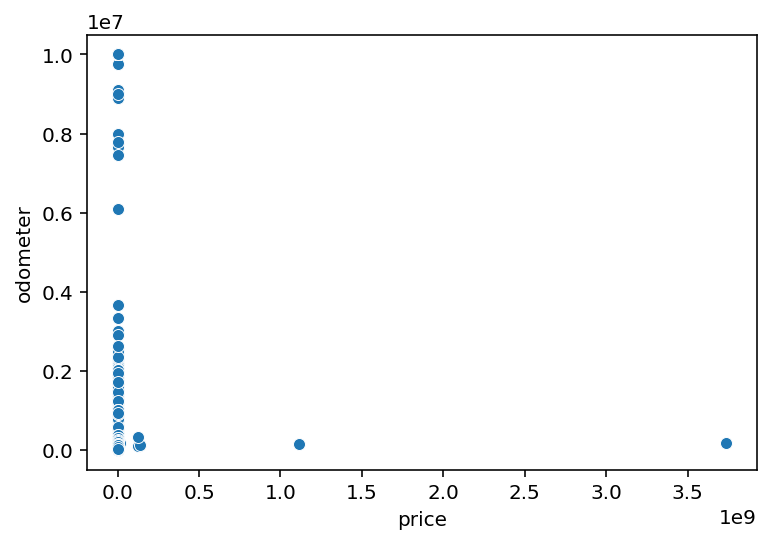

In [299]:
sns.scatterplot(data=df2,x='price',y='odometer')

<AxesSubplot:xlabel='Age(years)', ylabel='Average price by Year'>

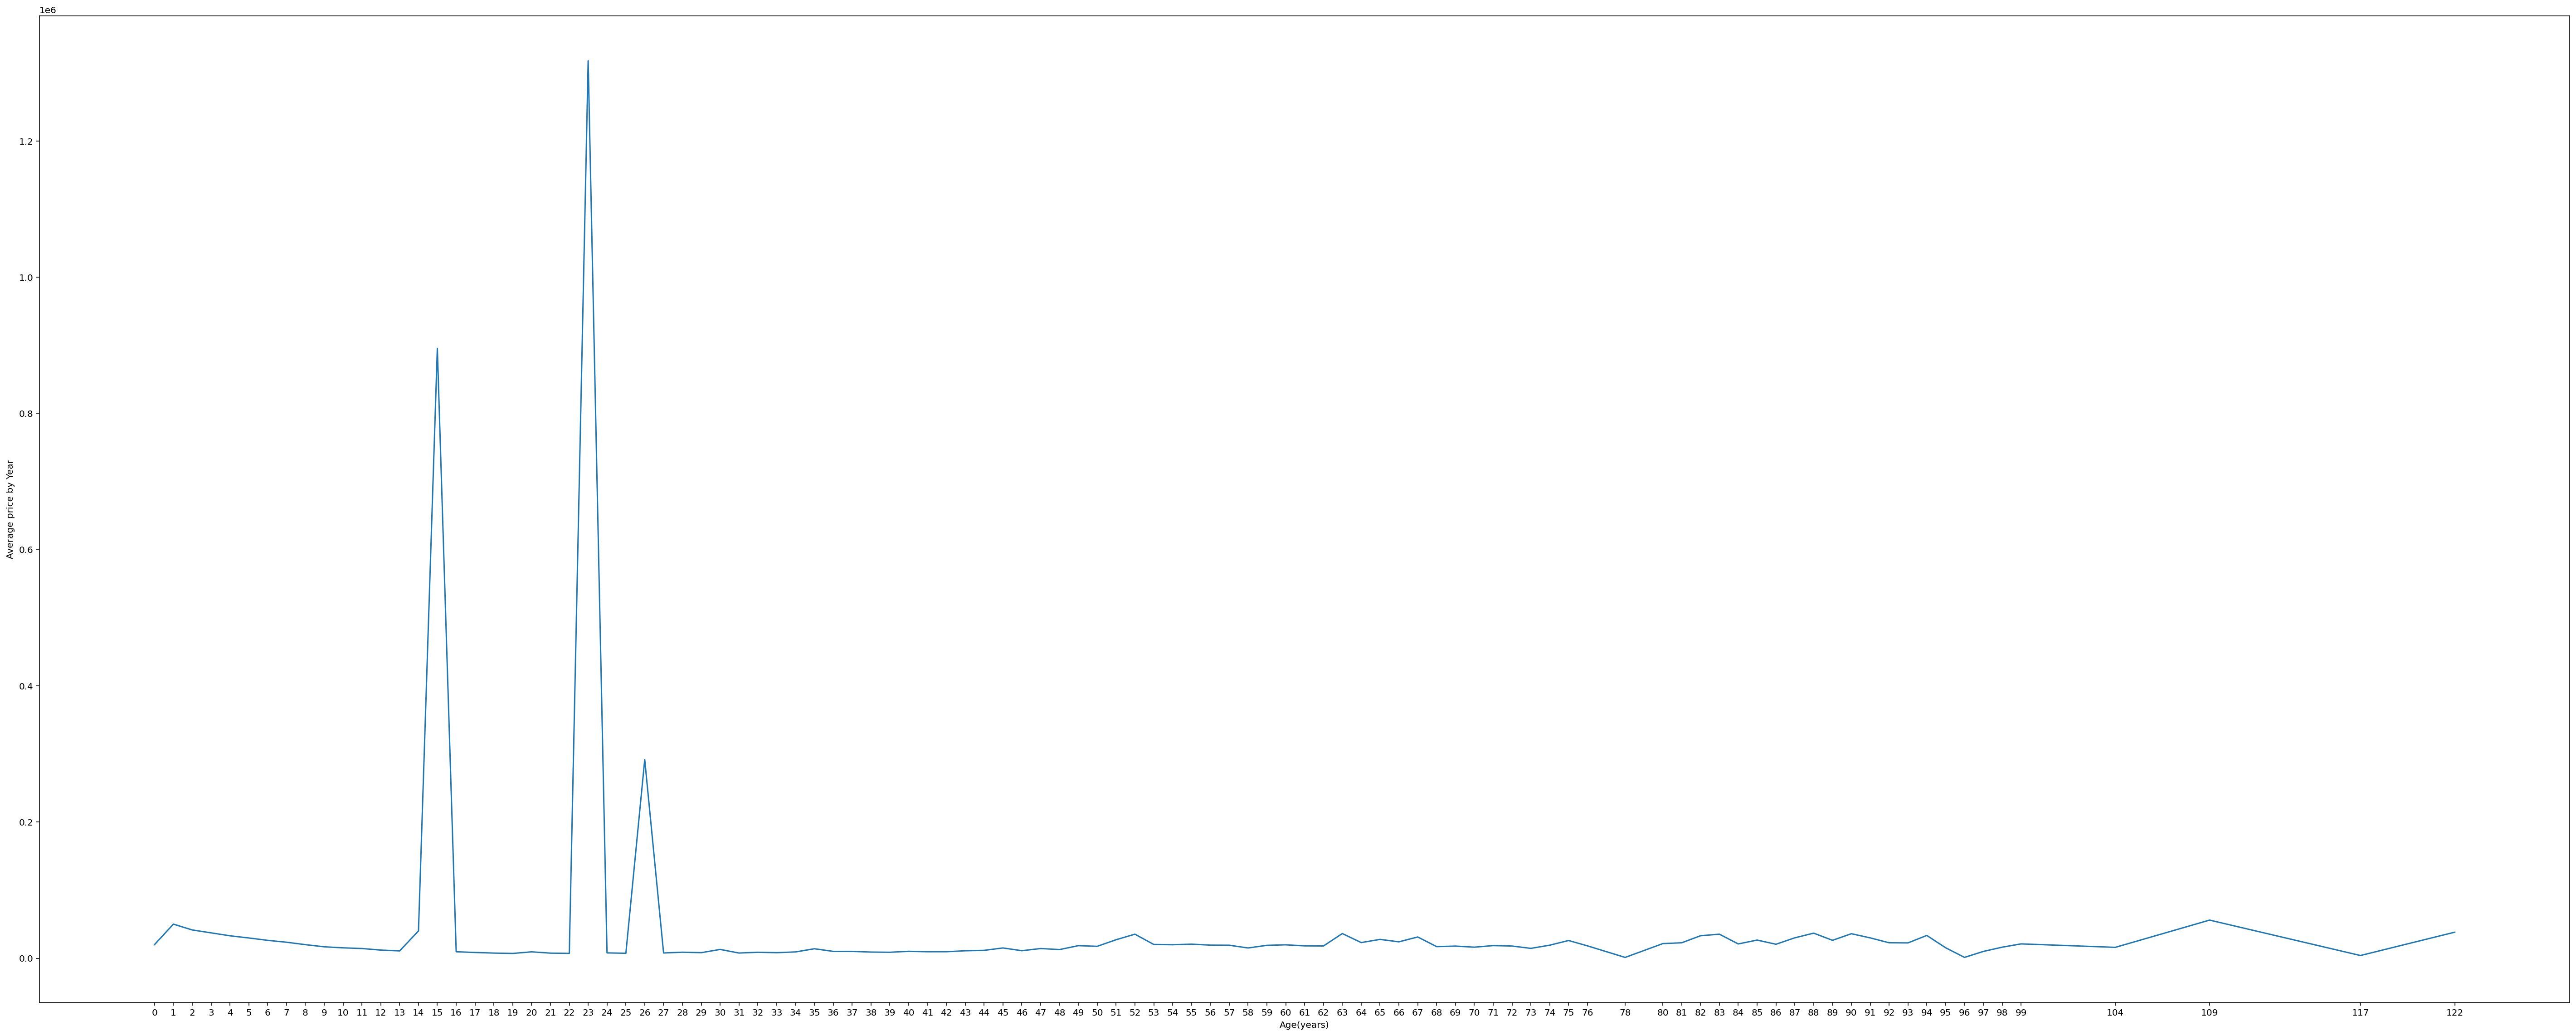

In [300]:
t1=df2.groupby(by='Age(years)')['price'].mean()
t1=pd.DataFrame(t1)
t1=t1.reset_index()
arr=np.array(t1['Age(years)'])
plt.figure(figsize=(50,20))
a=sns.lineplot(data=t1,x='Age(years)',y='price')
plt.xticks(arr)
plt.ylabel('Average price by Year')
a

<AxesSubplot:xlabel='year', ylabel='Average price by Year'>

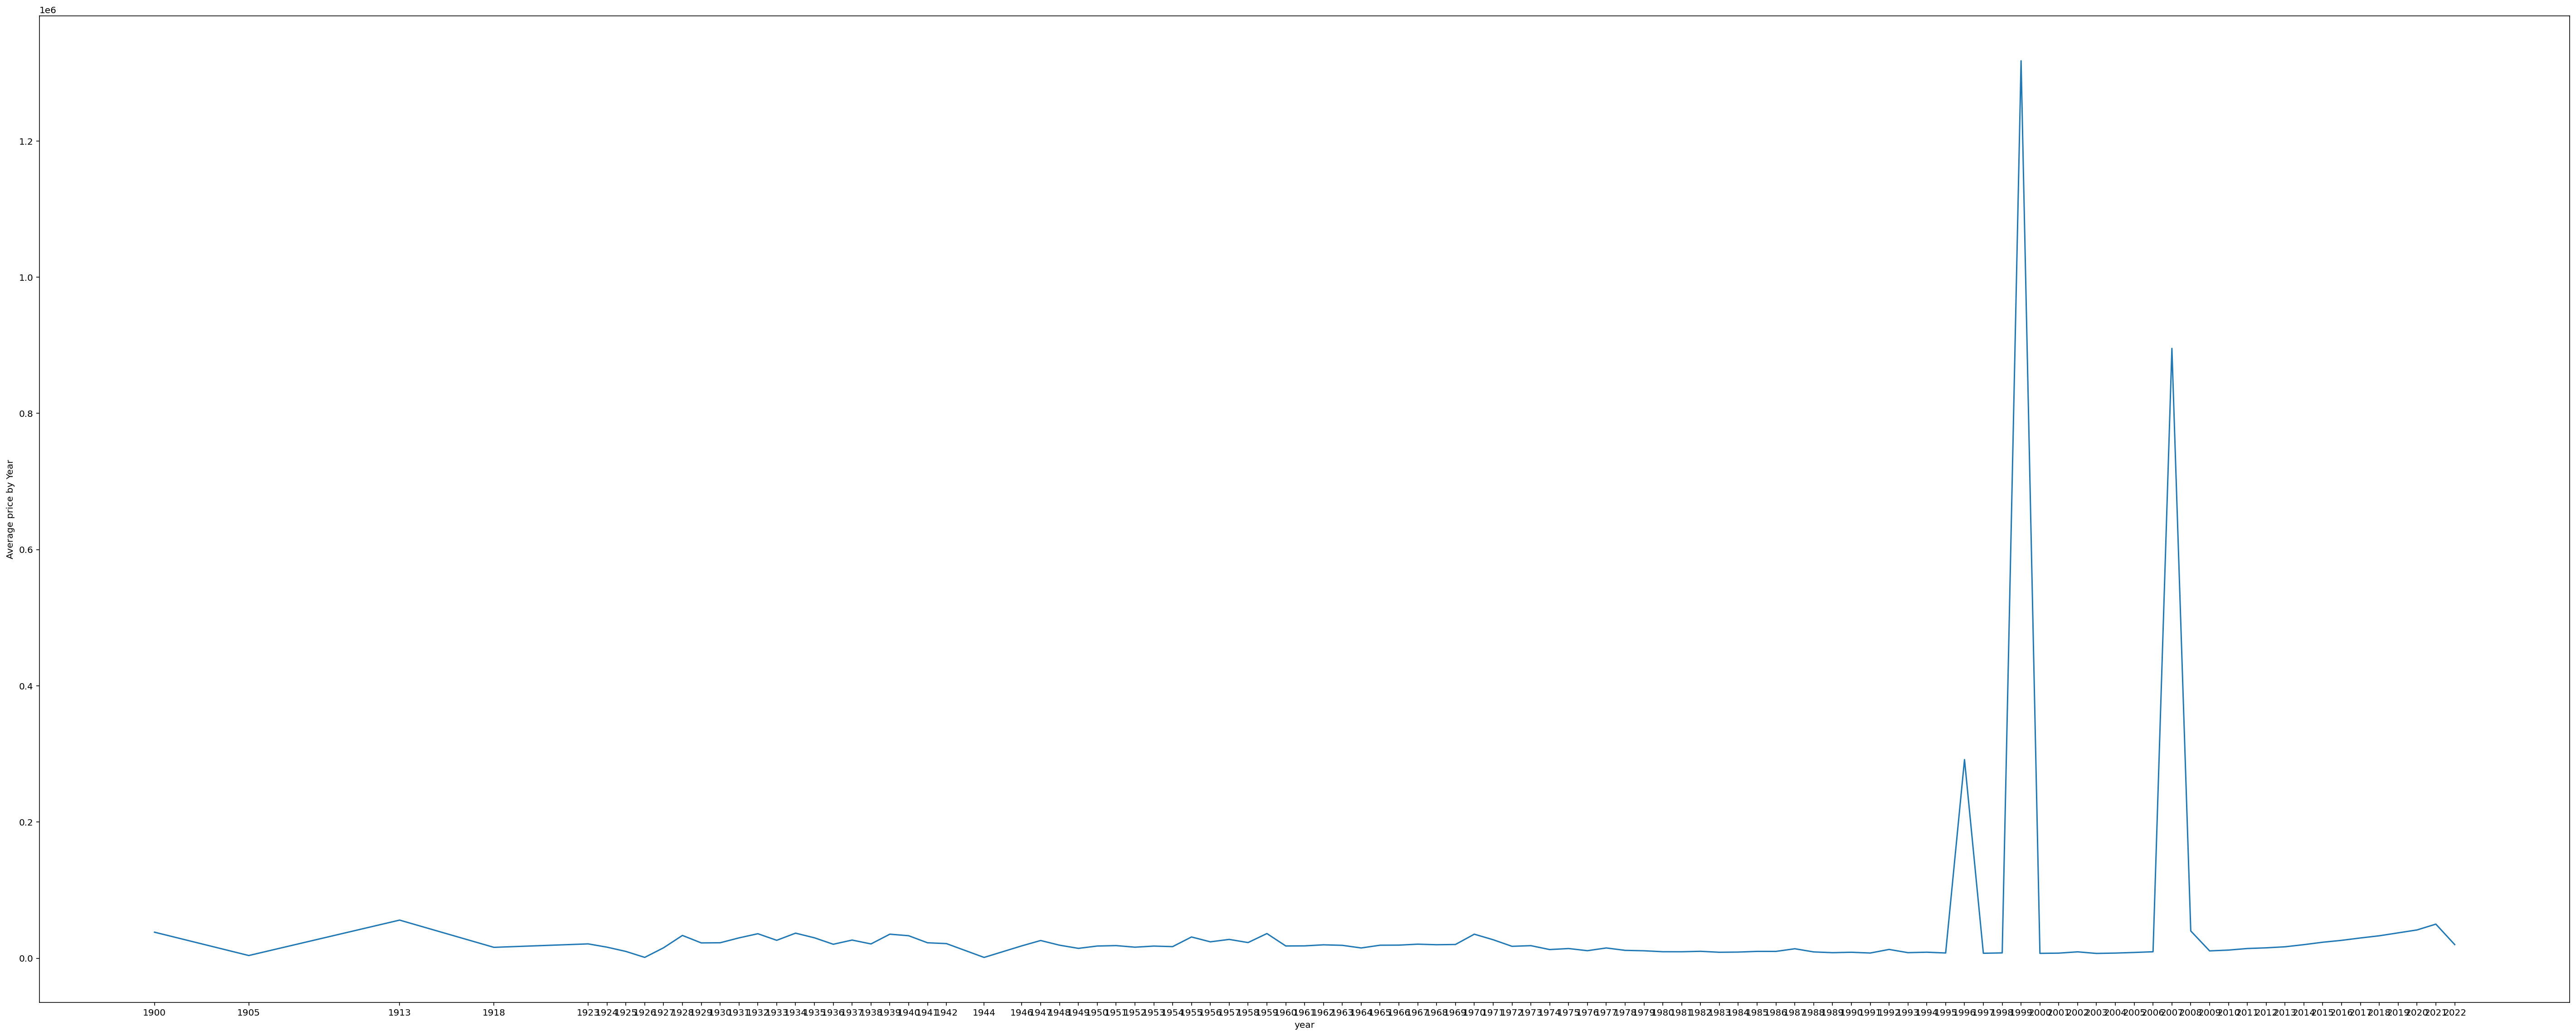

In [301]:
t1=df2.groupby(by='year')['price'].mean()
t1=pd.DataFrame(t1)
t1=t1.reset_index()
arr=np.array(t1['year'])
plt.figure(figsize=(50,20))
a=sns.lineplot(data=t1,x='year',y='price')
plt.xticks(arr)
plt.ylabel('Average price by Year')
a

In [302]:
df2[['Age(years)','odometer']].describe()

,Age(years),odometer
count,79603.000000,7.960300e+04
mean,13.498964,1.244649e+05
std,9.976604,2.423953e+05
min,0.000000,1.000000e+00
25%,8.000000,7.358900e+04
50%,11.000000,1.135050e+05
75%,16.000000,1.550000e+05
max,122.000000,1.000000e+07


#### Setting the limits based on the percentile to remove outliers for price

In [365]:
df2['odometer'].max()

286000.0

In [303]:
df2=df2[df2['Age(years)']<=70]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79301 entries, 31 to 426836
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            79301 non-null  object 
 1   region        79301 non-null  object 
 2   price         79301 non-null  float64
 3   year          79301 non-null  int64  
 4   manufacturer  79301 non-null  object 
 5   model         79301 non-null  object 
 6   condition     79301 non-null  object 
 7   cylinders     79301 non-null  object 
 8   fuel          79301 non-null  object 
 9   odometer      79301 non-null  float64
 10  title_status  79301 non-null  object 
 11  transmission  79301 non-null  object 
 12  VIN           79301 non-null  object 
 13  drive         79301 non-null  object 
 14  size          79301 non-null  object 
 15  type          79301 non-null  object 
 16  paint_color   79301 non-null  object 
 17  state         79301 non-null  object 
 18  Age(years)    79301 non-

In [331]:
odo_in_order = sorted(df2['odometer'])
q1, q2= np.percentile(odo_in_order,[0,99])
print(q1,q2)

1.0 286000.0


In [332]:
df2=df2[(df2['odometer']>=1) & (df2['odometer']<=286000)]

In [333]:
price_in_order = sorted(df2['price'])
q1, q2= np.percentile(price_in_order,[5,95])
print(q1,q2)

3000.0 37900.0


In [334]:
df2=df2[(df2['price']>=1995) & (df2['price']<=65995)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70702 entries, 31 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            70702 non-null  object 
 1   region        70702 non-null  object 
 2   price         70702 non-null  float64
 3   year          70702 non-null  int64  
 4   manufacturer  70702 non-null  object 
 5   model         70702 non-null  object 
 6   condition     70702 non-null  object 
 7   cylinders     70702 non-null  object 
 8   fuel          70702 non-null  object 
 9   odometer      70702 non-null  float64
 10  title_status  70702 non-null  object 
 11  transmission  70702 non-null  object 
 12  drive         70702 non-null  object 
 13  size          70702 non-null  object 
 14  type          70702 non-null  object 
 15  paint_color   70702 non-null  object 
 16  state         70702 non-null  object 
 17  Age(years)    70702 non-null  int64  
dtypes: float64(2), int64(2),

In [337]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70702 entries, 31 to 426833
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            70702 non-null  object 
 1   region        70702 non-null  object 
 2   price         70702 non-null  float64
 3   year          70702 non-null  int64  
 4   manufacturer  70702 non-null  object 
 5   model         70702 non-null  object 
 6   condition     70702 non-null  object 
 7   cylinders     70702 non-null  object 
 8   fuel          70702 non-null  object 
 9   odometer      70702 non-null  float64
 10  title_status  70702 non-null  object 
 11  transmission  70702 non-null  object 
 12  drive         70702 non-null  object 
 13  size          70702 non-null  object 
 14  type          70702 non-null  object 
 15  paint_color   70702 non-null  object 
 16  state         70702 non-null  object 
 17  Age(years)    70702 non-null  int64  
dtypes: float64(2), int64(2),

<AxesSubplot:title={'center':'age of vehicles'}, xlabel='Age(years)', ylabel='Count of Used Vehicles'>

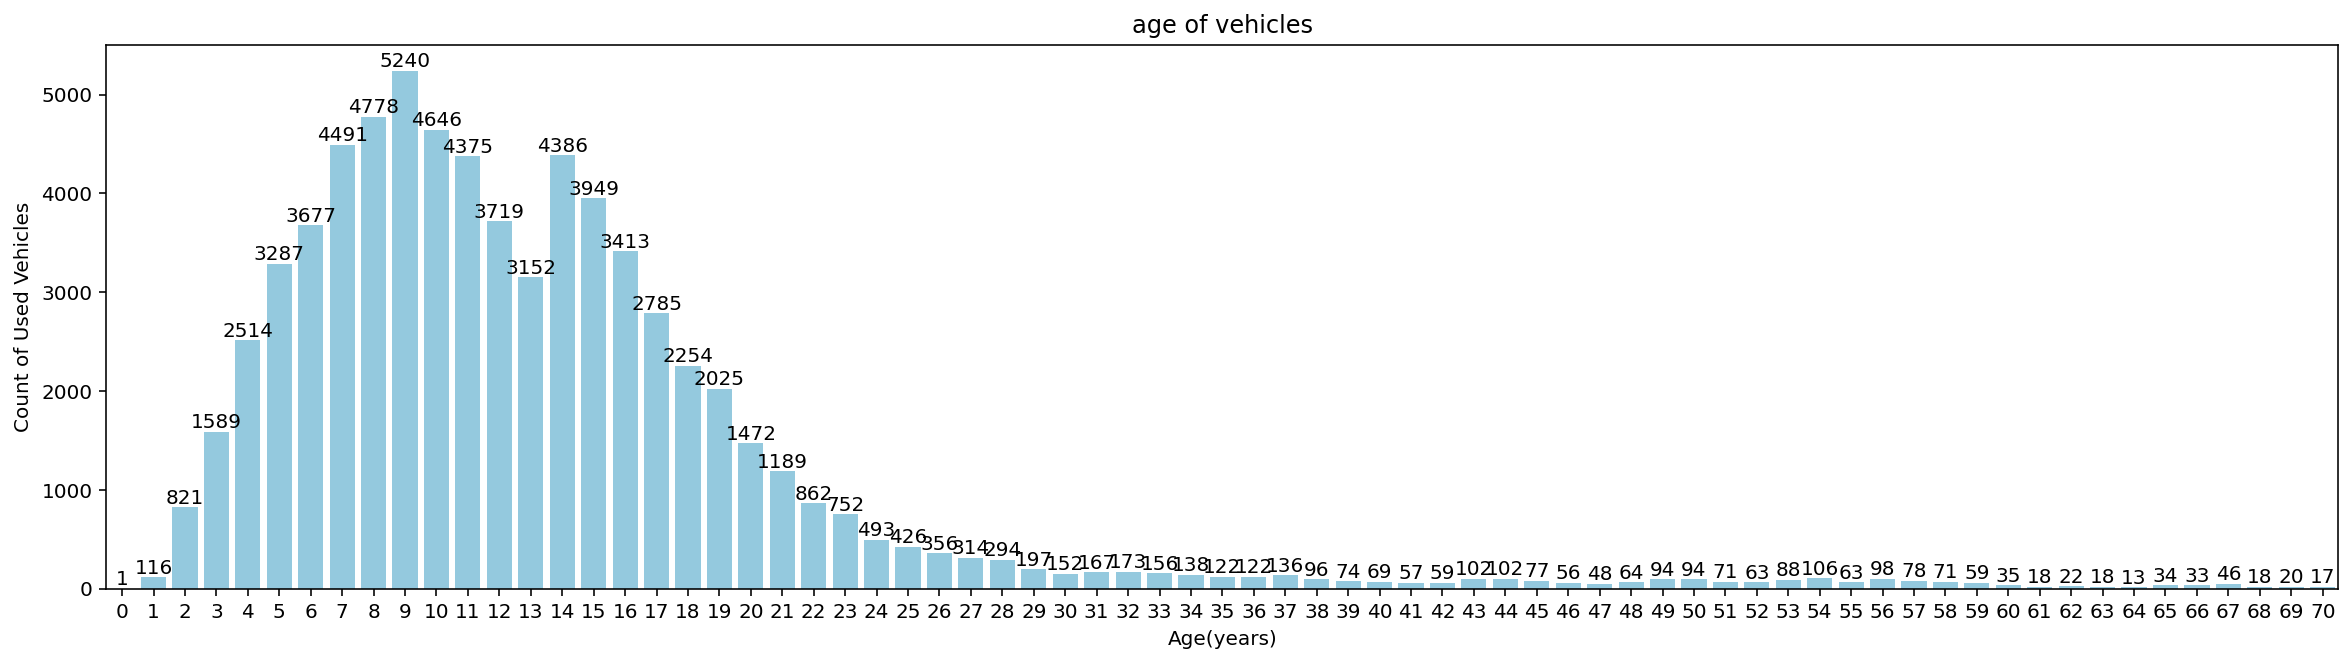

In [345]:
plt.figure(figsize=(20,5))
b=sns.countplot(data=df2,x='Age(years)', color='skyblue')
b.bar_label(b.containers[0])
plt.ylabel('Count of Used Vehicles')
plt.title('age of vehicles')
b

<AxesSubplot:title={'center':'condition of vehicles'}, xlabel='condition', ylabel='Count of Used Vehicles'>

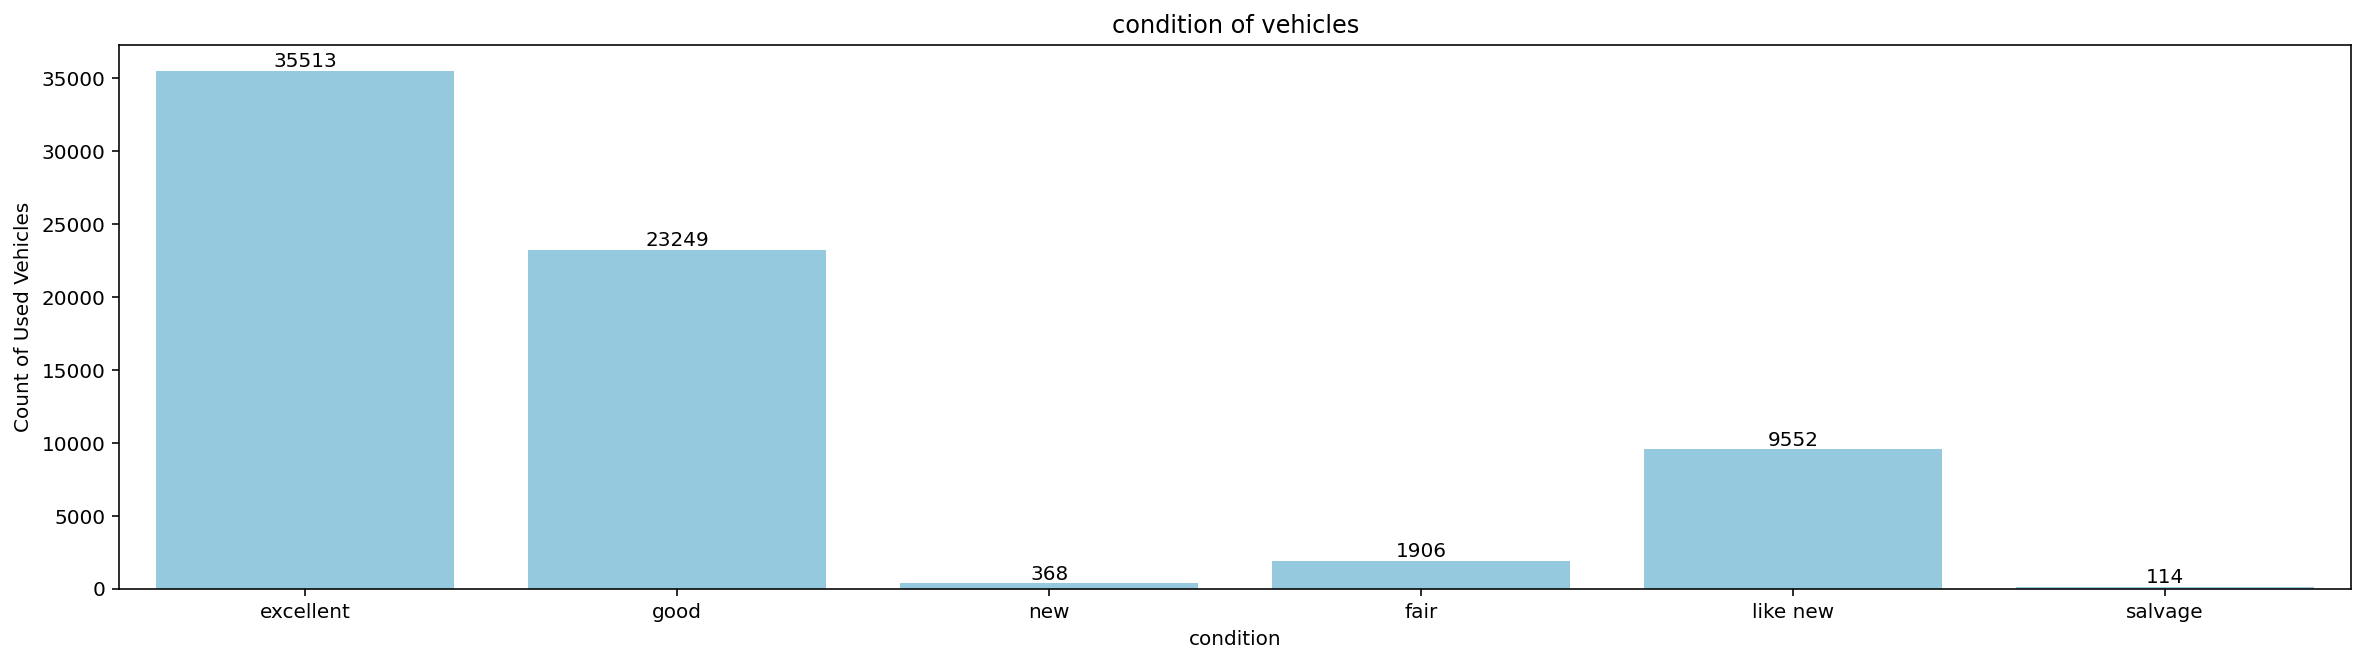

In [346]:
plt.figure(figsize=(20,5))
b=sns.countplot(data=df2,x='condition', color='skyblue')
b.bar_label(b.containers[0])
plt.ylabel('Count of Used Vehicles')
plt.title('condition of vehicles')
b

<AxesSubplot:title={'center':'Price Ranking of fuel and transmission used vehicles'}, xlabel='Top priced fuel and transmission', ylabel='Average Price'>

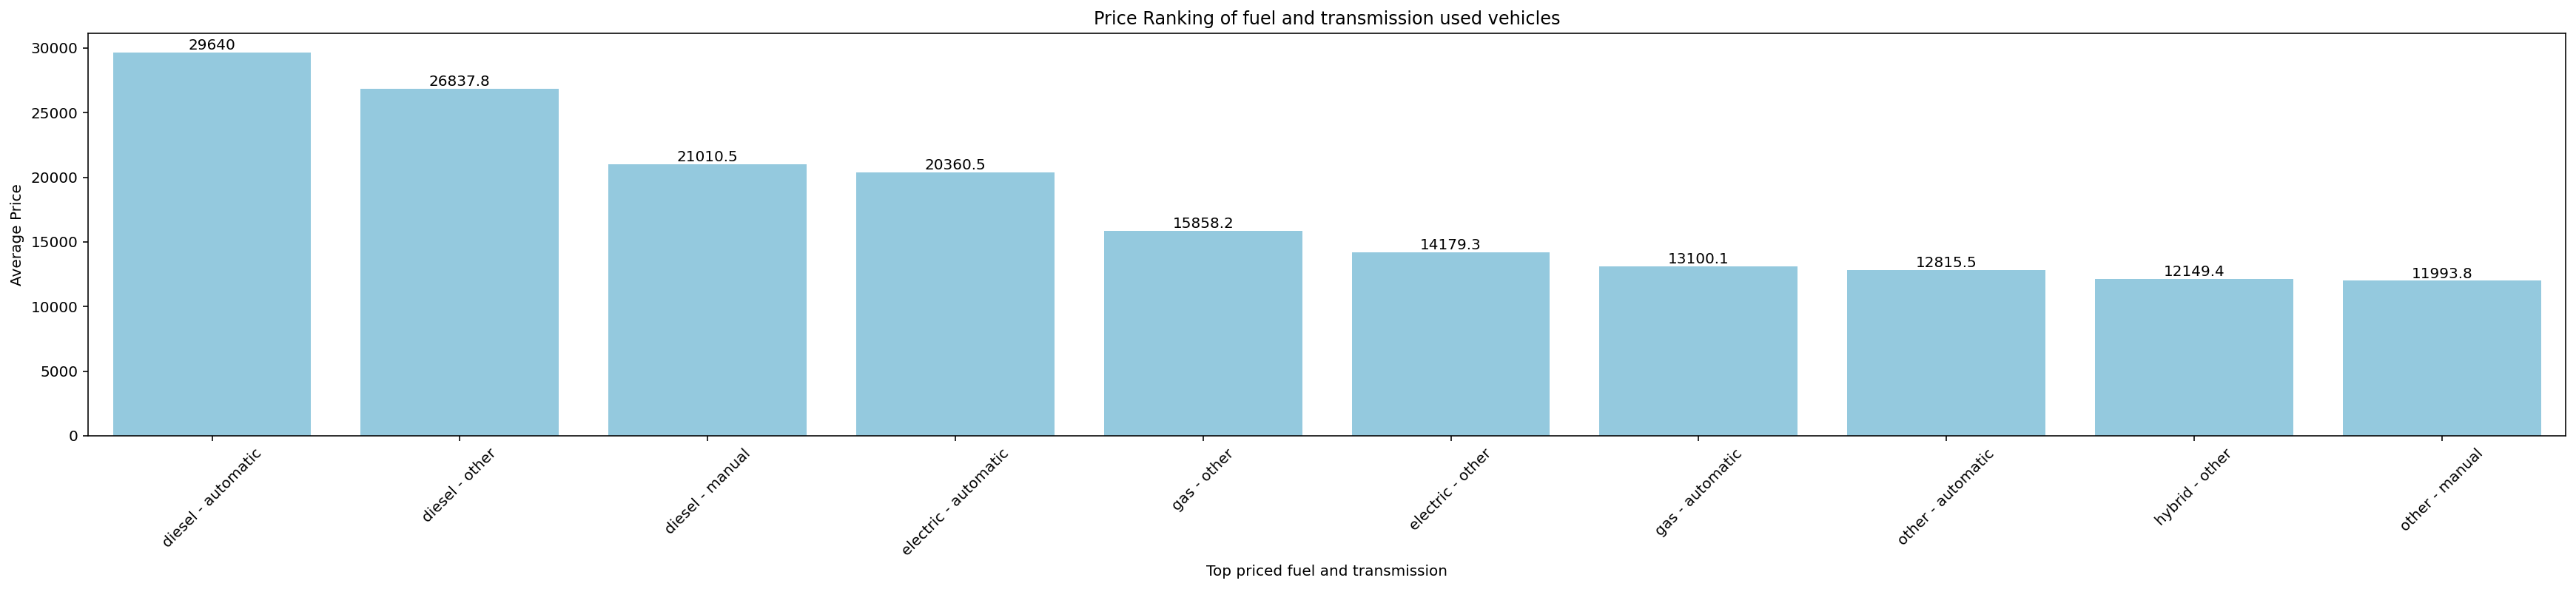

In [359]:
t2=df2.groupby(by=['fuel','transmission'])['price'].mean()
t2=pd.DataFrame(t2).reset_index()
t3=t2.sort_values(by='price',ascending=False).head(10)
t3['fuel&transmission']=t3['fuel'].str.cat(t3['transmission'], sep=' - ')
plt.figure(figsize=(30,5))
c=sns.barplot(data=t3,x='fuel&transmission', y='price', color='skyBlue')
c.bar_label(c.containers[0])
plt.xlabel('Top priced fuel and transmission')
plt.title('Price Ranking of fuel and transmission used vehicles')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
c

<AxesSubplot:title={'center':'Price Ranking of fuel and type used vehicles'}, xlabel='Top priced fuel and type used vehicles', ylabel='Average Price'>

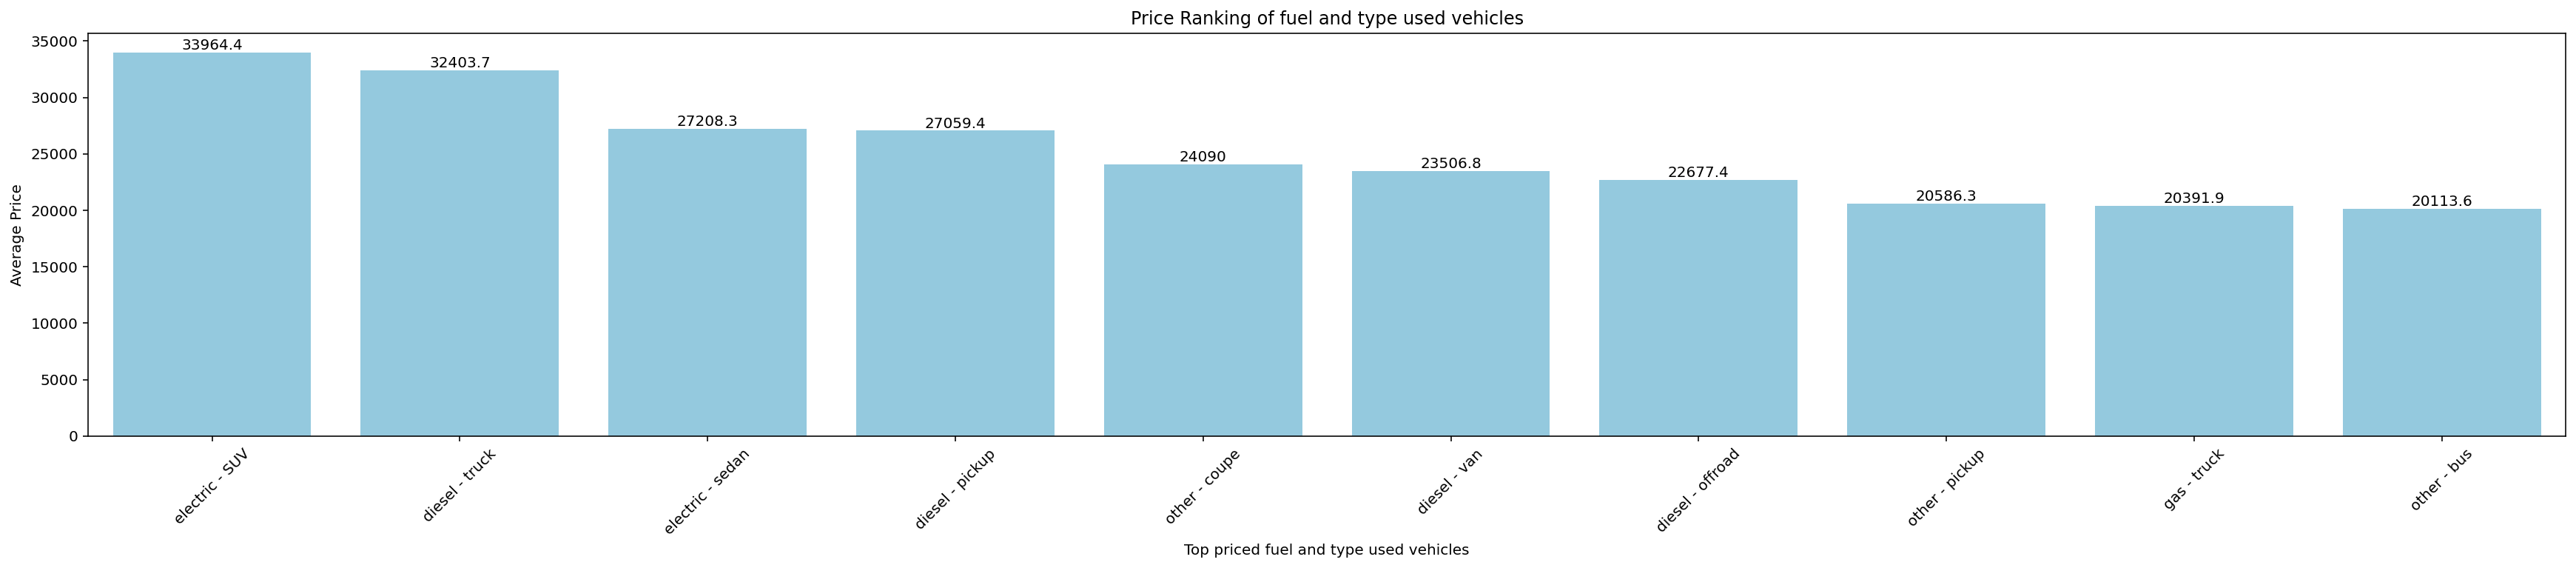

In [358]:
t2=df2.groupby(by=['fuel','type'])['price'].mean()
t2=pd.DataFrame(t2).reset_index()
t3=t2.sort_values(by='price',ascending=False).head(10)
t3['fuel&type']=t3['fuel'].str.cat(t3['type'], sep=' - ')
plt.figure(figsize=(30,5))
c=sns.barplot(data=t3,x='fuel&type', y='price', color='skyBlue')
c.bar_label(c.containers[0])
plt.xlabel('Top priced fuel and type used vehicles')
plt.title('Price Ranking of fuel and type used vehicles')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
c

#### Encoding categorical values

In [369]:
df2.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'Age(years)'],
      dtype='object')

In [370]:
contin_var = df2.select_dtypes(include=['int64','float64'])
cate_var = df2.select_dtypes(include='object')
cols=cate_var.columns

In [371]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cate_var[cols]:
    cate_var[col] = lb.fit_transform(cate_var[col])

/var/folders/l3/9xtv7x9n2rs7xwk9c451w0q40000gn/T/ipykernel_32398/4283701000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_var[col] = lb.fit_transform(cate_var[col])


In [372]:
contin_var.reset_index(drop = True, inplace=True)
cate_var.reset_index(drop = True, inplace=True)
df_concat = pd.concat([contin_var,cate_var], axis = 1)
df_concat.head()

,price,year,odometer,Age(years),id,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,15000.0,2013,128000.0,9,61929,16,13,3599,0,5,2,0,0,2,1,10,0,1
1,19900.0,2004,88000.0,18,45006,16,13,3930,2,6,0,0,0,0,1,8,1,1
2,14000.0,2012,95000.0,10,37257,16,16,5873,0,5,2,0,0,1,1,5,9,1
3,22500.0,2001,144700.0,21,34258,16,13,4051,2,6,0,0,1,2,1,10,10,1
4,15000.0,2017,90000.0,5,31796,16,10,2070,0,6,2,4,0,2,2,9,5,1


#### Checking for P-value & VIF for better performance
- Every column have p-value under 0.05
- Every column have VIF under 10
- But as we can see in summary below, conditon number is big and this could be revised by using scaler

In [407]:
import statsmodels.api as sm
smodel=sm.OLS(df_concat['price'], df_concat[['Age(years)', 'odometer', 'manufacturer','condition','transmission','drive','size','type','fuel','state','title_status','paint_color']])
res=smodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.616
Model:                            OLS   Adj. R-squared (uncentered):              0.616
Method:                 Least Squares   F-statistic:                              9466.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:11:18   Log-Likelihood:                     -7.5912e+05
No. Observations:               70702   AIC:                                  1.518e+06
Df Residuals:                   70690   BIC:                                  1.518e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Age(years)     -95.1605      5.019    -18.962      0.000    -104.997     -85.324
odometer        -0.0464      0.001    -64.940      0.000      -0.048      -0.045
manufacturer   120.2803      3.639     33.056      0.000     113.148     127.412
condition     1032.6837     34.713     29.749      0.000     964.646    1100.721
transmission  1202.2643    146.325      8.216      0.000     915.468    1489.061
drive        -1706.1248     58.316    -29.257      0.000   -1820.423   -1591.826
size          2568.5920     60.555     42.417      0.000    2449.903    2687.281
type           752.8256      9.835     76.549      0.000     733.550     772.101
fuel          1942.3742     62.949     30.856      0.000    1818.995    2065.754
state          116.7895      2.706     43.153      0.000     111.485     122.094
title_status  -401.2863     44.005     -9.119      0.000    -487.536    -315.036
paint_color    597.2505     10.305     57.960      0.000     577.053     617.447
==============================================================================
Omnibus:                    12677.611   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23736.903
Skew:                           1.120   Prob(JB):                         0.00
Kurtosis:                       4.743   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [408]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel.exog, i)} 
             for i, column in enumerate(smodel.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

,Column name,VIF
8,fuel,8.599053
1,odometer,4.874487
6,size,3.992570
0,Age(years),3.658060
2,manufacturer,3.563019
9,state,3.293170
7,type,2.972293
11,paint_color,2.904303
5,drive,2.404519
3,condition,1.841995


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

X=df_concat.drop(columns='price')
y=df_concat['price']

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

#### 1) Fit & transform train data(X_train) with scaler

In [413]:
std = StandardScaler()
robust = RobustScaler()

train_std = X_train[['odometer']]

contin_std = std.fit_transform(train_std)

contin_xtrain=pd.DataFrame(contin_std,columns=['odometer'])

contin_xtrain.head()

,odometer
0,2.160036
1,-0.433088
2,-0.701920
3,-0.938660
4,-0.050211


In [414]:
temp_df=X_train.drop(columns='odometer')

contin_xtrain.reset_index(drop = True, inplace=True)
temp_df.reset_index(drop = True, inplace=True)

X_train_scaled_concat = pd.concat([contin_xtrain,temp_df], axis = 1)
X_train_scaled_concat.head()

,odometer,year,Age(years),id,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,2.160036,1998,24,17094,158,33,74,0,6,2,0,0,2,1,10,10,27
1,-0.433088,2011,11,34199,185,17,4528,0,5,2,4,0,2,0,3,10,33
2,-0.701920,2012,10,36547,299,24,5612,3,5,2,0,0,1,1,9,3,43
3,-0.938660,2016,6,66752,234,3,1013,0,5,2,0,0,0,2,9,5,34
4,-0.050211,2012,10,13074,79,30,6892,2,3,2,4,0,1,2,9,8,8


#### 2) Transform test data(X_test) with fitted scaler¶

In [415]:
test_std = X_test[['odometer']]

contin_std_test = std.transform(test_std)

contin_xtest=pd.DataFrame(contin_std_test,columns=['odometer'])

contin_xtest.head()

,odometer
0,-1.709810
1,0.992260
2,0.723028
3,0.191698
4,-0.694089


In [416]:
temp_df=X_test.drop(columns='odometer')

contin_xtest.reset_index(drop = True, inplace=True)
temp_df.reset_index(drop = True, inplace=True)

X_test_scaled_concat = pd.concat([contin_xtest,temp_df], axis = 1)
X_test_scaled_concat.head()

,odometer,year,Age(years),id,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
0,-1.709810,2015,7,2055,74,7,2578,3,3,2,0,0,1,2,9,0,35
1,0.992260,2008,14,13900,32,16,2591,2,3,2,0,0,1,2,0,1,14
2,0.723028,2004,18,67986,228,27,6770,1,5,2,0,0,2,1,12,9,40
3,0.191698,2008,14,63257,119,30,6892,0,3,2,0,0,1,2,9,1,4
4,-0.694089,2017,5,63764,216,36,5220,0,3,2,4,0,0,1,9,10,23


#### 3) Check for P-value & VIF after scaling
We can see that condition number has dropped about 1/10 after scaling but still it's high
This is because Mileage column still have wide range of value after dropping outliers and scaling
Year column have VIF over 10

In [417]:
temp1=pd.DataFrame(y_train, columns=['price'])
temp1.reset_index(drop = True, inplace=True)

temp2 = pd.concat([X_train_scaled_concat,temp1], axis = 1)
temp2.head()

,odometer,year,Age(years),id,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state,price
0,2.160036,1998,24,17094,158,33,74,0,6,2,0,0,2,1,10,10,27,3895.0
1,-0.433088,2011,11,34199,185,17,4528,0,5,2,4,0,2,0,3,10,33,9500.0
2,-0.701920,2012,10,36547,299,24,5612,3,5,2,0,0,1,1,9,3,43,12500.0
3,-0.938660,2016,6,66752,234,3,1013,0,5,2,0,0,0,2,9,5,34,18685.0
4,-0.050211,2012,10,13074,79,30,6892,2,3,2,4,0,1,2,9,8,8,5000.0


In [421]:
import statsmodels.api as sm
smodel=sm.OLS(temp2['price'], temp2[['odometer', 'fuel', 'type', 'transmission', 'Age(years)','model','state','manufacturer','paint_color','year']])
res=smodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     3977.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:17:21   Log-Likelihood:            -5.1805e+05
No. Observations:               49491   AIC:                         1.036e+06
Df Residuals:                   49481   BIC:                         1.036e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
odometer     -4918.7729     39.197   -125.488      0.000   -4995.600   -4841.946
fuel         -7923.2382     75.490   -104.957      0.000   -8071.200   -7775.277
type            80.8639      9.362      8.637      0.000      62.514      99.214
transmission   195.0257    134.810      1.447      0.148     -69.203     459.254
Age(years)    -278.0665      4.473    -62.169      0.000    -286.833    -269.300
model            0.3417      0.016     21.888      0.000       0.311       0.372
state          -18.1409      2.564     -7.075      0.000     -23.167     -13.115
manufacturer   -45.8267      3.431    -13.358      0.000     -52.551     -39.102
paint_color     85.9648      9.705      8.858      0.000      66.943     104.987
year            15.6126      0.110    141.754      0.000      15.397      15.828
==============================================================================
Omnibus:                     9856.831   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24283.555
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       5.622   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [422]:
pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel.exog, i)} 
             for i, column in enumerate(smodel.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

,Column name,VIF
9,year,33.469613
4,Age(years),3.485258
2,type,1.058456
3,transmission,1.054457
0,odometer,1.050570
1,fuel,1.046308
5,model,1.020811
8,paint_color,1.013346
7,manufacturer,1.012033
6,state,1.001837


#### Models

In [423]:
lr = LinearRegression()
lr.fit(X_train_scaled_concat, y_train)
pred = lr.predict(X_test_scaled_concat)
print('MSE:',mean_squared_error(y_test,pred),'\n','R2 score: ',r2_score(y_test,pred))

MSE: 60667283.10416285 
 R2 score:  0.5242955045439777


In [424]:
sgdr=SGDRegressor()
sgdr.fit(X_train_scaled_concat, y_train)
pred = sgdr.predict(X_test_scaled_concat)
print('MSE:',mean_squared_error(y_test,pred),'\n','R2 score: ',r2_score(y_test,pred))

MSE: 9.829842766509794e+31 
 R2 score:  -7.70777947254689e+23


In [425]:
ridge = Ridge()
ridge.fit(X_train_scaled_concat, y_train)
pred = ridge.predict(X_test_scaled_concat)
print('MSE:',mean_squared_error(y_test,pred),'\n','R2 score: ',r2_score(y_test,pred))

MSE: 60667371.144770525 
 R2 score:  0.5242948141996816


In [426]:
lasso = Lasso()
lasso.fit(X_train_scaled_concat, y_train)
pred = lasso.predict(X_test_scaled_concat)
print('MSE:',mean_squared_error(y_test,pred),'\n','R2 score: ',r2_score(y_test,pred))

MSE: 60668715.67199871 
 R2 score:  0.5242842714884544


In [427]:
rfr=RandomForestRegressor()
rfr.fit(X_train_scaled_concat, y_train)
pred = rfr.predict(X_test_scaled_concat)
print('MSE:',mean_squared_error(y_test,pred),'\n','R2 score: ',r2_score(y_test,pred))

MSE: 15281826.890718905 
 R2 score:  0.8801720898195804


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### The best model when reviewing the R2 score is lowest for linear regression model at 0.5242842714884544
The r2 score varies between 0 and 100%. It is closely related to the MSE.
A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.
Our goal here is to explain. We can of course let scikit-learn to this with the r2_score() method
odometer is definitely showing a strong correlation to price.

Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.
### therefore, for linear regression the lowest error does help make it very reliable among the models used: MSE: 60667283.10416285 

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

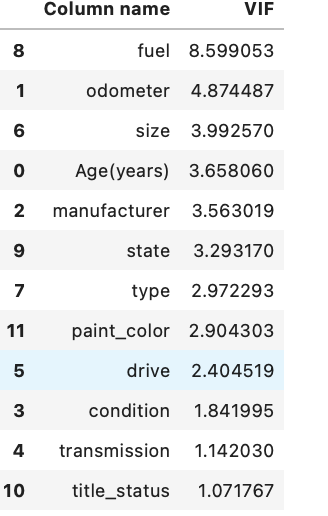

### In reviewinging the VIF values- fuel, odometer, size and Age(years) of the vehicle play a huge part in driving the decisions of paying a higher price offered for the used vehicle. Since the default cuoff is 5, you can see that odometer plays a huge part even though fuel is higher and less than 10.

### Summary
- Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
- Multicollinearity inflates the variance and type II error. It makes the coefficient of a variable consistent but unreliable.
- VIF measures the number of inflated variances caused by multicollinearity.
- more importantly, using the VIF approach and models will help us bring more models and correlation reasons to how we justify using the above features and modeling approach.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

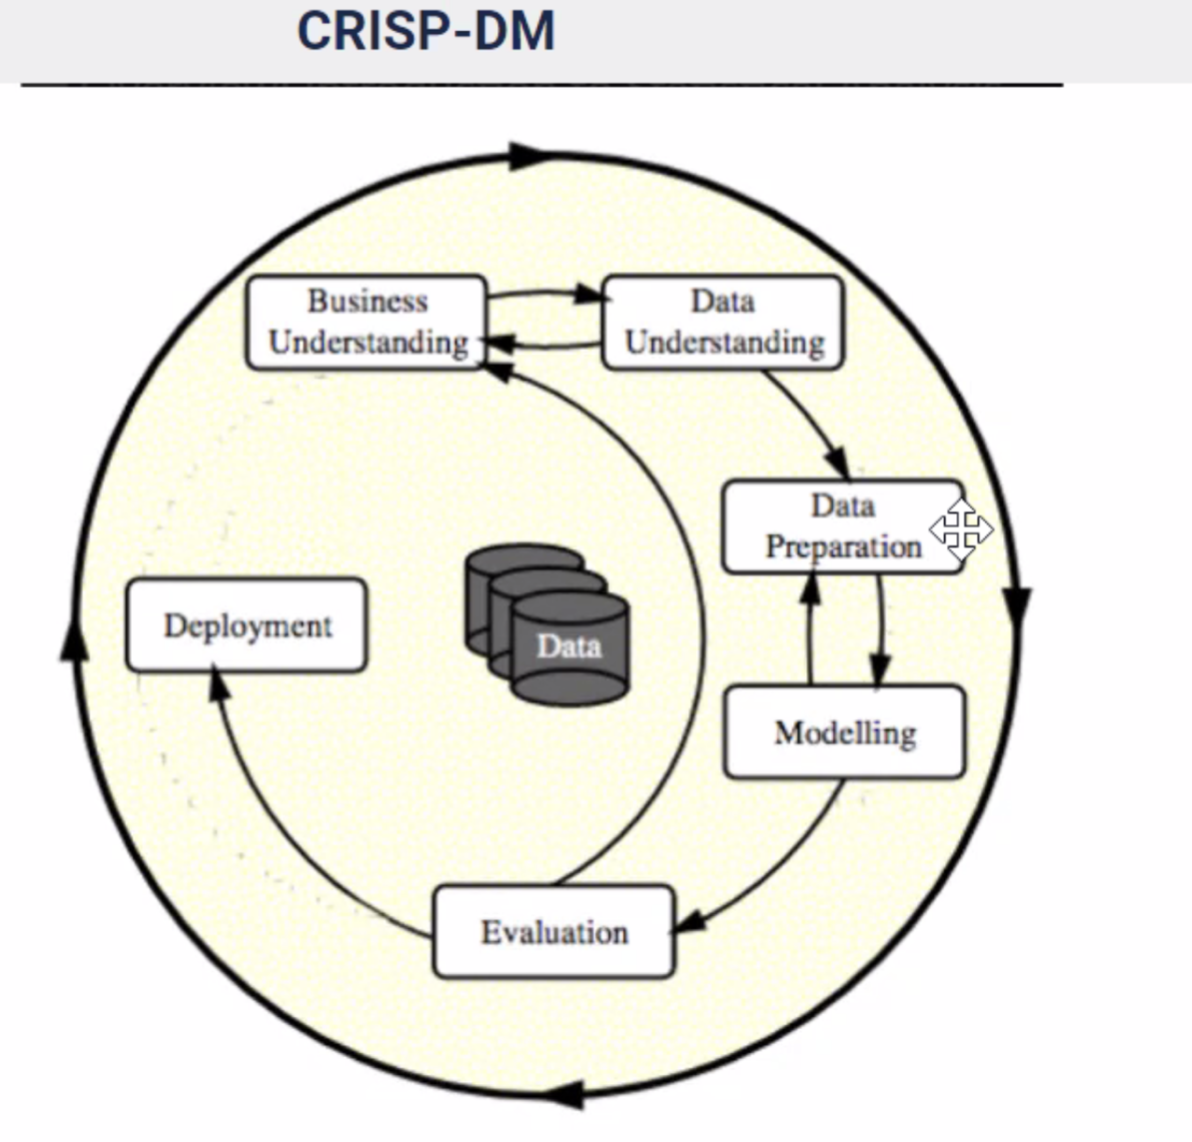

## Here are my recommendations to deploy the above model:
## - Business Understanding (CRISP-DM) : objective:maixmize revenues daily and reduce inventory on the lot/increase unit sales.
### 1.Load the set of inventory available on the lot daily at the start of the day
### 2.focus on taking the outlier inventory that includes vehicles that are too old (largest number of years from mannufactured date i.e. Age(years) above, Consider selling these rare old inventory using more specific non-conventional methods like eBay bidding and auction houses due their rarity
## - Consumer perspective of the choices and preference of attribute
### 3. build a questionaire online before user arrives at the used car dealership on the features.
### 4. Modeling -focus on population for certain manufacturer if that is the top preference, build the regression model of price to odometer for just that population of used vehicles for example, Toyota.we can then use the best model to forecast the predicted price for that manufacturer and then recommend using VIF the top features that would give us the reason for pricing the recommended models shown in the below example. The Average price would serve as a starting point for negotiation and offering the price to the consumer based on the population of prices set in the database.
###  5. Evaluation - the buyer would then evaluate with the used car dealership on the combination of features and models with further drill into similar charts and tables below.

In [430]:
df3=df2[df2['manufacturer']=='toyota']

<AxesSubplot:title={'center':'Top 10 high Toyota Models'}, xlabel='Top 10 high priced Manufacturer & Model', ylabel='Average Price'>

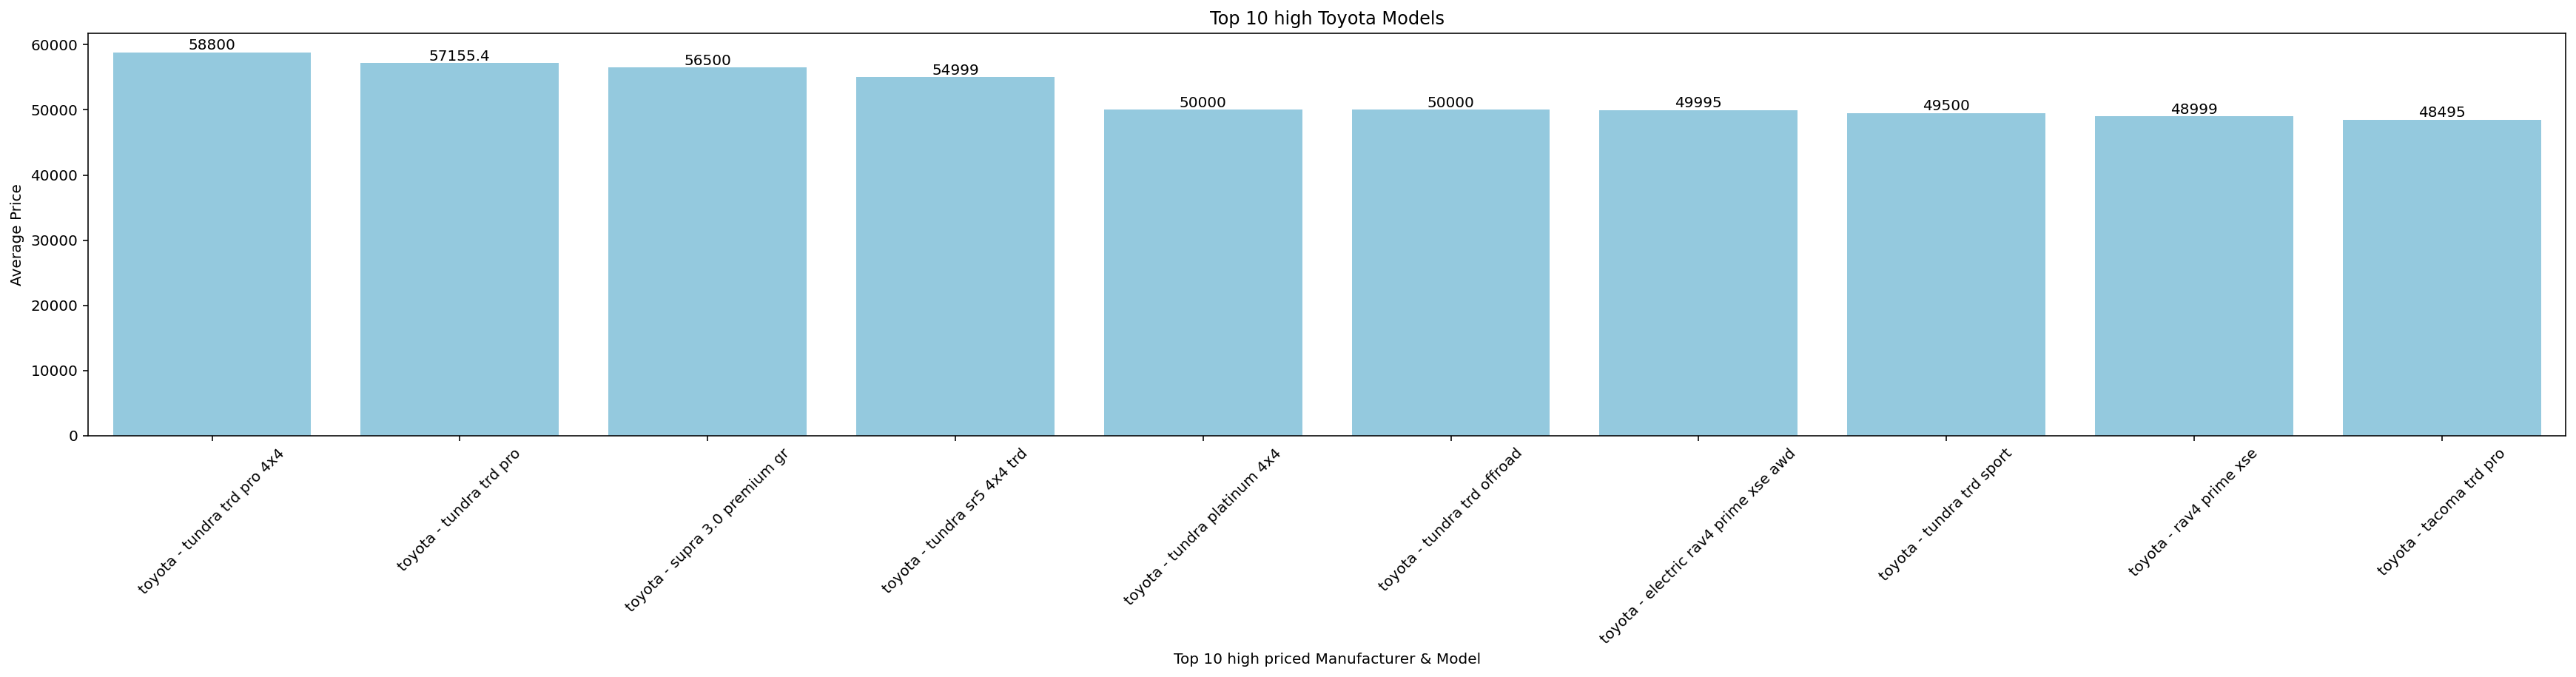

In [432]:
t2=df3.groupby(by=['manufacturer','model'])['price'].mean()
t2=pd.DataFrame(t2).reset_index()
t3=t2.sort_values(by='price',ascending=False).head(10)
t3['Manufacturer&Model']=t3['manufacturer'].str.cat(t3['model'], sep=' - ')
plt.figure(figsize=(30,5))
c=sns.barplot(data=t3,x='Manufacturer&Model', y='price', color='skyBlue')
c.bar_label(c.containers[0])
plt.xlabel('Top 10 high priced Manufacturer & Model')
plt.title('Top 10 high Toyota Models')
plt.ylabel('Average Price')

plt.xticks(rotation=45)
c

In [439]:
df3.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,Age(years)
119,7306407989,auburn,17500.0,2008,toyota,fj cruiser,good,6 cylinders,gas,201300.0,clean,manual,4wd,full-size,offroad,black,al,14
215,7316482063,birmingham,4000.0,2002,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,20
332,7315377651,birmingham,15000.0,2009,toyota,tacoma 4x4,good,6 cylinders,gas,213800.0,clean,automatic,4wd,mid-size,truck,silver,al,13
339,7315345469,birmingham,50000.0,2019,toyota,tundra,like new,8 cylinders,gas,20010.0,clean,automatic,4wd,full-size,truck,white,al,3
373,7314893113,birmingham,8900.0,2013,toyota,prius,excellent,4 cylinders,hybrid,142900.0,clean,automatic,fwd,mid-size,wagon,blue,al,9


In [437]:
df4=df3[df3['model']=='tundra trd sport']

df4.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,Age(years)
68062,7308549465,ventura county,49500.0,2019,toyota,tundra trd sport,excellent,8 cylinders,gas,16000.0,clean,automatic,4wd,full-size,truck,white,ca,3


In [438]:
df4=df3[df3['model']=='rav4 prime xse']

df4.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,Age(years)
274304,7310284962,long island,48999.0,2021,toyota,rav4 prime xse,new,4 cylinders,electric,1200.0,lien,automatic,4wd,compact,SUV,white,ny,1
